This project proposes a machine learning-based anomaly detection system to identify potentially fraudulent transactions.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


**Data Visualizaions**

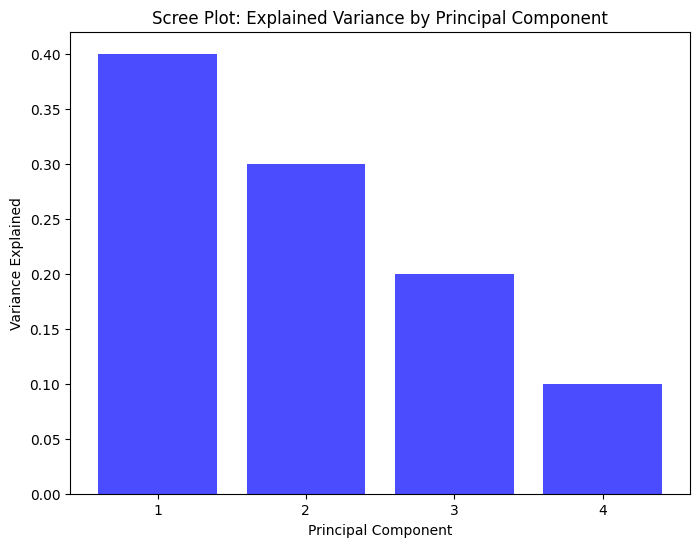

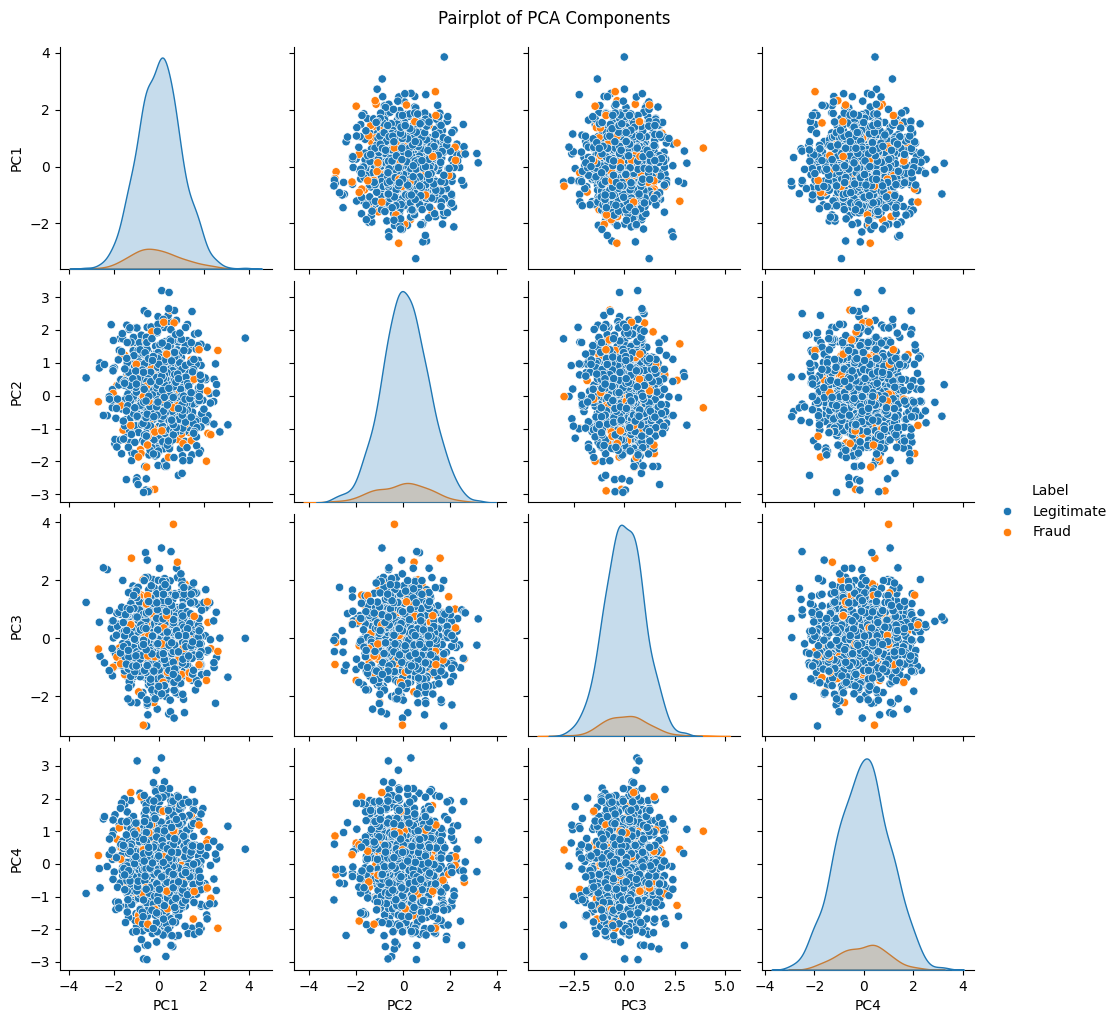

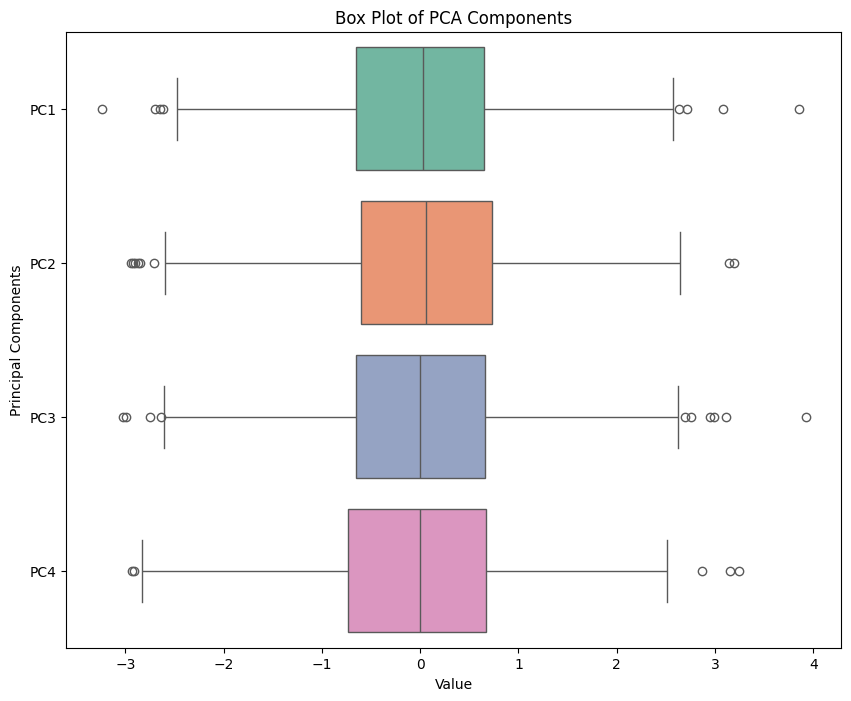

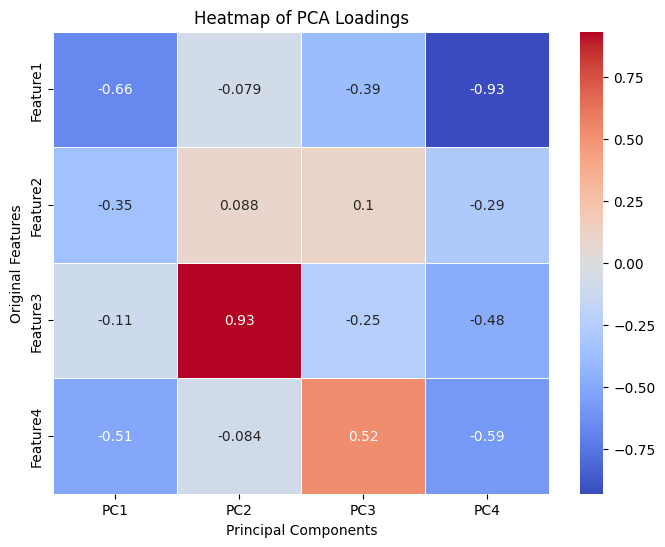

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming `data` is the PCA-transformed dataset with components named "PC1", "PC2", etc.
# `labels` represents the target class (fraud or non-fraud).
# For demonstration, creating dummy data for visualization:
np.random.seed(42)
n_samples = 1000
data = pd.DataFrame({
    "PC1": np.random.normal(0, 1, n_samples),
    "PC2": np.random.normal(0, 1, n_samples),
    "PC3": np.random.normal(0, 1, n_samples),
    "PC4": np.random.normal(0, 1, n_samples)
})
labels = np.random.choice(["Fraud", "Legitimate"], size=n_samples, p=[0.1, 0.9])

# Scree Plot
explained_variance_ratio = [0.4, 0.3, 0.2, 0.1]  # Dummy values for explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

# Pairplot for PCA Components
pairplot_data = data.copy()
pairplot_data["Label"] = labels
sns.pairplot(pairplot_data, vars=["PC1", "PC2", "PC3", "PC4"], hue="Label", diag_kind="kde")
plt.suptitle('Pairplot of PCA Components', y=1.02)
plt.show()

# Box Plot for PCA Components across labels
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.title("Box Plot of PCA Components")
plt.xlabel("Value")
plt.ylabel("Principal Components")
plt.show()

# Heatmap of PCA Loadings
# Assuming `loadings` is the matrix of PCA loadings (original features to components)
# Dummy data for loadings:
loadings = np.random.uniform(-1, 1, (4, 4))  # 4 features mapped to 4 components
loading_df = pd.DataFrame(loadings, columns=["PC1", "PC2", "PC3", "PC4"], index=["Feature1", "Feature2", "Feature3", "Feature4"])

plt.figure(figsize=(8, 6))
sns.heatmap(loading_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Heatmap of PCA Loadings")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.show()


**Data Pre-processing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')


X = data.drop(columns=['Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_scaled: (227845, 30)
Shape of X_test_scaled: (56962, 30)
Shape of y_train: (227845,)
Shape of y_test: (56962,)


In [ ]:
import numpy as np
y_true=np.array(y_test)
y_true

array([1, 0, 0, ..., 0, 0, 0])

**Baselines(SVM and LR)**

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

print("SVM Results:")
print(classification_report(y_test, svm_preds))

print("Logistic Regression Results:")
print(classification_report(y_test, lr_preds))

SVM Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.62      0.76        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Train and predict with SVM
svm_model = SVC(kernel='rbf', gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)

# Calculate anomaly scores for SVM (using probability estimates)
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1 (fraud)
print("SVM Anomaly Scores:")
print(svm_probs)

# Train and predict with Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# Calculate anomaly scores for Logistic Regression (using probability estimates)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1 (fraud)
print("Logistic Regression Anomaly Scores:")
print(lr_probs)

# Classification Reports
print("SVM Results:")
print(classification_report(y_test, svm_preds))

print("Logistic Regression Results:")
print(classification_report(y_test, lr_preds))


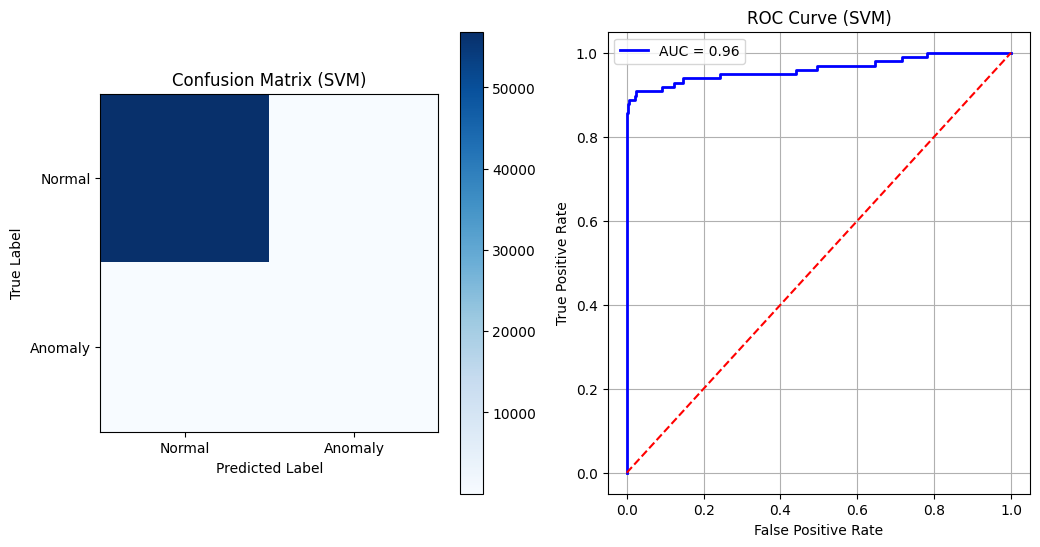

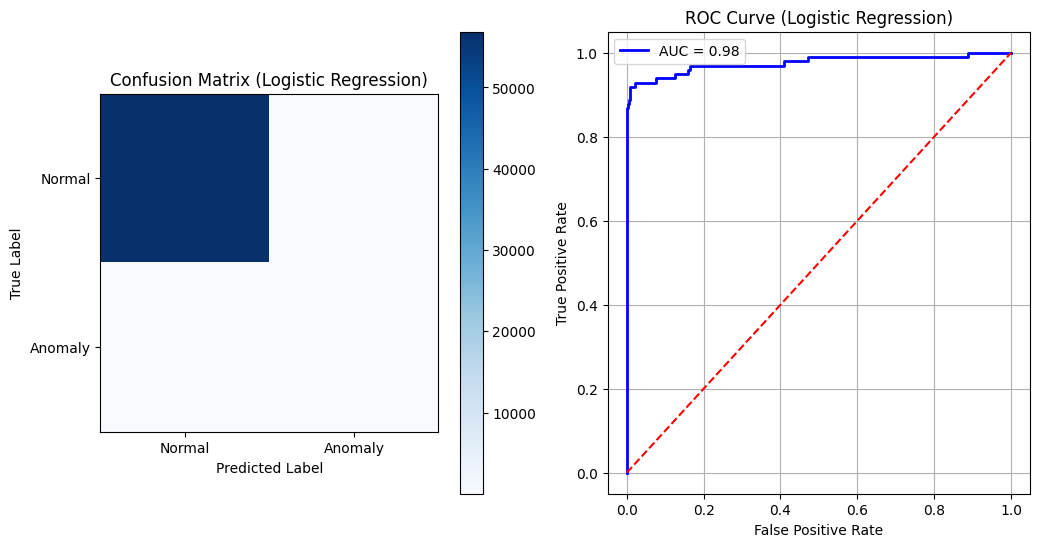

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

svm_cm = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(svm_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVM)')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.yticks([0, 1], ['Normal', 'Anomaly'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

svm_scores = svm_model.decision_function(X_test_scaled)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_scores)
svm_auc_roc = roc_auc_score(y_test, svm_scores)
plt.subplot(1, 2, 2)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'AUC = {svm_auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend()
plt.grid(True)
plt.show()

lr_cm = confusion_matrix(y_test, lr_preds)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(lr_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression)')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.yticks([0, 1], ['Normal', 'Anomaly'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

lr_scores = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_scores)
lr_auc_roc = roc_auc_score(y_test, lr_scores)
plt.subplot(1, 2, 2)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AUC = {lr_auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()


**Algorithm Implementation using PyTorch**

In [ ]:
import torch

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


**Isolation Forest algorithm**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class IsolationTree:
    def __init__(self, X, max_depth):
        self.X = X
        self.max_depth = max_depth
        self.n_samples, self.n_features = X.shape
        self.tree = self.build_tree(X, depth=0)

    def build_tree(self, X, depth):
        n_samples, n_features = X.shape

        if depth >= self.max_depth or n_samples <= 1:
            return {"leaf": True, "size": n_samples}

        feature_idx = np.random.choice(n_features, 1)[0]
        split_value = np.random.uniform(X[:, feature_idx].min(), X[:, feature_idx].max())

        left_indices = X[:, feature_idx] < split_value
        right_indices = ~left_indices

        left_subtree = self.build_tree(X[left_indices], depth + 1)
        right_subtree = self.build_tree(X[right_indices], depth + 1)

        return {"leaf": False, "feature_idx": feature_idx, "split_value": split_value,
                "left": left_subtree, "right": right_subtree}

    def path_length(self, x, tree, depth):
        if tree["leaf"]:
            return depth
        if x[tree["feature_idx"]] < tree["split_value"]:
            return self.path_length(x, tree["left"], depth + 1)
        else:
            return self.path_length(x, tree["right"], depth + 1)

    def anomaly_score(self, x):
        path_lengths = np.array([self.path_length(x_i, self.tree, 0) for x_i in x])
        return 2.0 ** (-np.mean(path_lengths / np.log(self.n_samples)))

class IsolationForest:
    def __init__(self, n_trees=500, max_depth=50, subsample_size=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_size = subsample_size

    def fit(self, X):
        if self.subsample_size is None:
            self.subsample_size = min(256, len(X))

        self.trees = []
        for _ in range(self.n_trees):
            sample_indices = np.random.choice(len(X), self.subsample_size, replace=False)
            X_subsample = X[sample_indices]
            tree = IsolationTree(X_subsample, self.max_depth)
            self.trees.append(tree)

    def anomaly_scores(self, X):
        scores = np.array([tree.anomaly_score(X) for tree in self.trees])
        return np.mean(scores, axis=0)


In [ ]:
X_train_numpy = X_train_tensor.numpy()
X_test_numpy = X_test_tensor.numpy()

isolation_forest = IsolationForest(n_trees=100, max_depth=50)
isolation_forest.fit(X_train_numpy)

anomaly_scores = isolation_forest.anomaly_scores(X_test_numpy)

In [ ]:
print(anomaly_scores)

0.17281932344523634


In [ ]:
import numpy as np

print(type(anomaly_scores))
print(anomaly_scores.shape)


<class 'numpy.float64'>
()


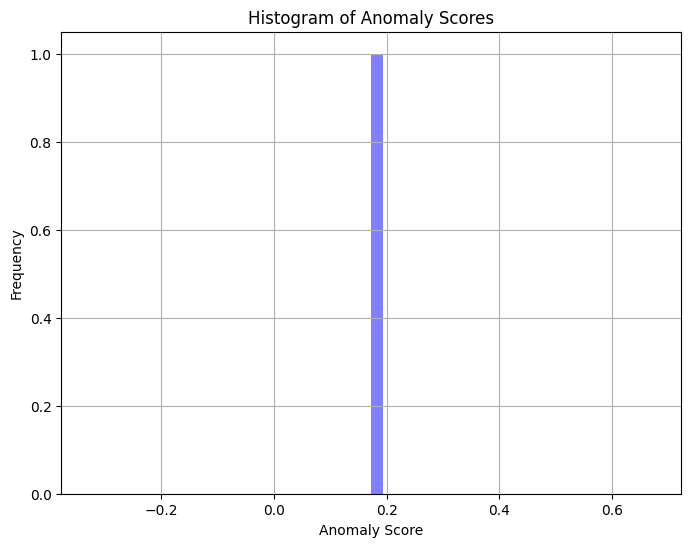

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.5)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores')
plt.grid(True)
plt.show()

Testing parameters: nu=0.01, lr=0.0001, num_epochs=100
Precision: 0.0017204452090867595, Recall: 0.05001580000702222
Testing parameters: nu=0.01, lr=0.0001, num_epochs=200
Precision: 0.0017204452090867595, Recall: 0.05001580000702222
Testing parameters: nu=0.01, lr=0.001, num_epochs=100
Precision: 0.0017204452090867595, Recall: 0.05001580000702222
Testing parameters: nu=0.01, lr=0.001, num_epochs=200
Precision: 0.0017204452090867595, Recall: 0.04996313331694814
Testing parameters: nu=0.05, lr=0.0001, num_epochs=100
Precision: 0.0017204452090867595, Recall: 0.05001580000702222
Testing parameters: nu=0.05, lr=0.0001, num_epochs=200
Precision: 0.0017204452090867595, Recall: 0.05001580000702222
Testing parameters: nu=0.05, lr=0.001, num_epochs=100
Precision: 0.0017204452090867595, Recall: 0.0499982444436642
Testing parameters: nu=0.05, lr=0.001, num_epochs=200
Precision: 0.0017204452090867595, Recall: 0.04998068888030617
Best parameters: {'nu': 0.01, 'lr': 0.0001, 'num_epochs': 100}, Best 

**One-Class SVM**

In [ ]:
import torch.optim as optim

class OneClassSVM:
    def __init__(self, nu=0.01, kernel='rbf', gamma='auto', lr=0.0001, num_epochs=500):
        self.nu = nu
        self.kernel = kernel
        self.gamma = gamma
        self.lr = lr
        self.num_epochs = num_epochs

    def fit(self, X):
        self.X = torch.tensor(X, dtype=torch.float32)
        input_dim = self.X.shape[1]

        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

        for epoch in range(self.num_epochs):
            outputs = self.model(self.X)
            loss = self.criterion(outputs, torch.ones_like(outputs))
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

    def anomaly_scores(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        with torch.no_grad():
            outputs = self.model(X_tensor)
        scores = outputs.cpu().numpy()
        return scores


In [ ]:
svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
svm_model.fit(X_train_numpy)

anomaly_scores_svm = svm_model.anomaly_scores(X_test_numpy)

best_score_ocsvm = np.min(anomaly_scores_svm)
print("Best Anomaly Score:", best_score_ocsvm)


Best Anomaly Score: 0.73698956


In [ ]:
threshold = np.percentile(anomaly_scores_svm, 95)

y_pred_svm = anomaly_scores_svm > threshold

tp_svm = np.sum((y_pred_svm == 1) & (y_true == 1))
fp_svm = np.sum((y_pred_svm == 1) & (y_true == 0))
fn_svm = np.sum((y_pred_svm == 0) & (y_true == 1))

precision_svm = tp_svm / (tp_svm + fp_svm)
recall_svm = tp_svm / (tp_svm + fn_svm)

print("Precision (OCSVM):", precision_svm)
print("Recall (OCSVM):", recall_svm)


Precision (OCSVM): 0.0017204452090867595
Recall (OCSVM): 0.05001580000702222


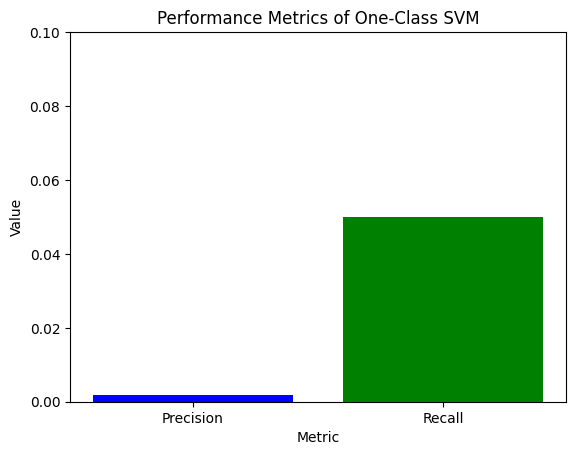

In [ ]:
import matplotlib.pyplot as plt

threshold = np.percentile(anomaly_scores_svm, 95)
y_pred_svm = anomaly_scores_svm > threshold
tp_svm = np.sum((y_pred_svm == 1) & (y_true == 1))
fp_svm = np.sum((y_pred_svm == 1) & (y_true == 0))
fn_svm = np.sum((y_pred_svm == 0) & (y_true == 1))
precision_svm = tp_svm / (tp_svm + fp_svm)
recall_svm = tp_svm / (tp_svm + fn_svm)

labels = ['Precision', 'Recall']
values = [precision_svm, recall_svm]

plt.bar(labels, values, color=['blue', 'green'])
plt.title('Performance Metrics of One-Class SVM')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 0.1)
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision_svm, recall_svm, _ = precision_recall_curve(y_true, -anomaly_scores_svm)
auprc_svm = auc(recall_svm, precision_svm)
print("One-Class SVM AUPRC:", auprc_svm)

One-Class SVM AUPRC: 0.0008678234339315993


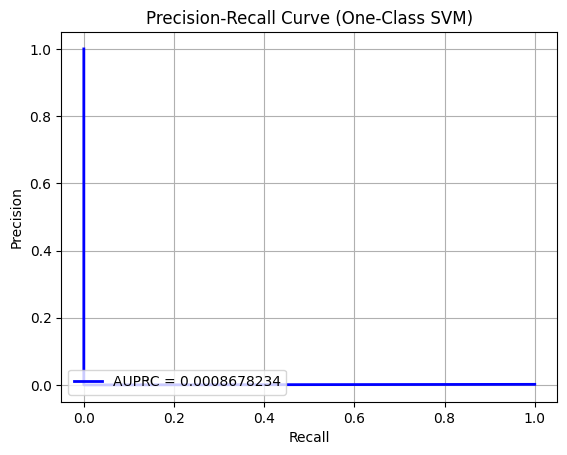

In [ ]:
import matplotlib.pyplot as plt

precision_svm, recall_svm, _ = precision_recall_curve(y_true, -anomaly_scores_svm)
auprc_svm = auc(recall_svm, precision_svm)

plt.plot(recall_svm, precision_svm, color='blue', lw=2, label=f'AUPRC = {auprc_svm:.10f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-Class SVM)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


n_clusters: 2, Silhouette Score: 0.1291785091161728
n_clusters: 3, Silhouette Score: 0.07655874639749527
n_clusters: 5, Silhouette Score: 0.04676268994808197
n_clusters: 8, Silhouette Score: 0.09363335371017456
n_clusters: 10, Silhouette Score: 0.04995052516460419
Best n_clusters: 2, Best Silhouette Score: 0.1291785091161728
Best Anomaly Score (KMeans): 2.183387
Precision (K-Means): 0.03088803088803089
Recall (K-Means): 0.8979591836734694


Cluster Summary:
         Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
Cluster                                                                         
0        0.895737  0.122303  0.241961 -0.947416  0.032255  0.600041 -0.348898   
1       -0.874227 -0.112718  0.115327  0.466974  0.141773 -0.152994 -0.022498   
2        0.504821  0.150605 -0.412840  0.224816 -0.313983 -0.331762  0.440560   
3       -0.057390 -1.584899 -3.212044 -1.466122  0.743189 -2.104337  1.138347   
4        0.902260  0.149033  0.102960 -0.385959 -0.153739  0.285857 -0.107182   

         Feature8  Feature9  Feature10  ...  Feature21  Feature22  Feature23  \
Cluster                                 ...                                    
0        0.453491 -0.208458  -0.152789  ...  -0.074853   0.266565   0.891130   
1       -0.065211  0.050256  -0.062212  ...   0.026386  -0.080128  -0.202872   
2       -0.631917  0.144927   0.102958  ...  -0.095275   0.200660   0.650567   
3        2.4742

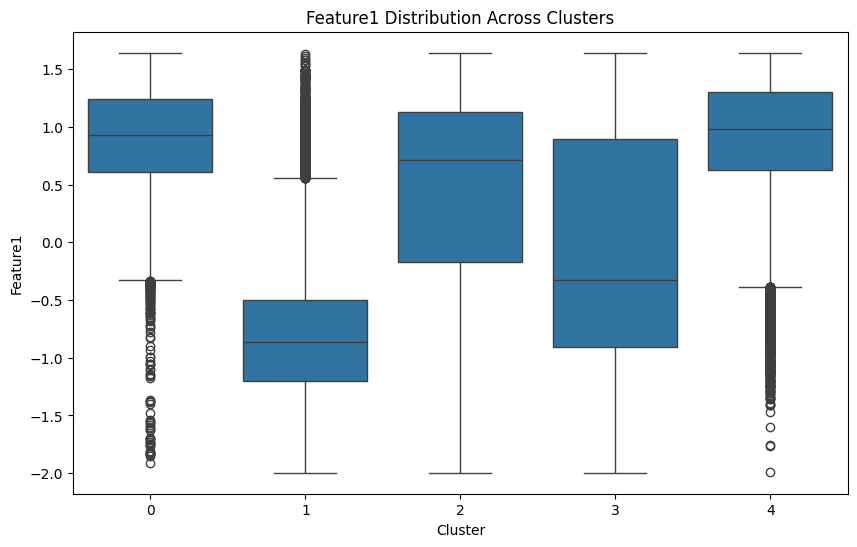

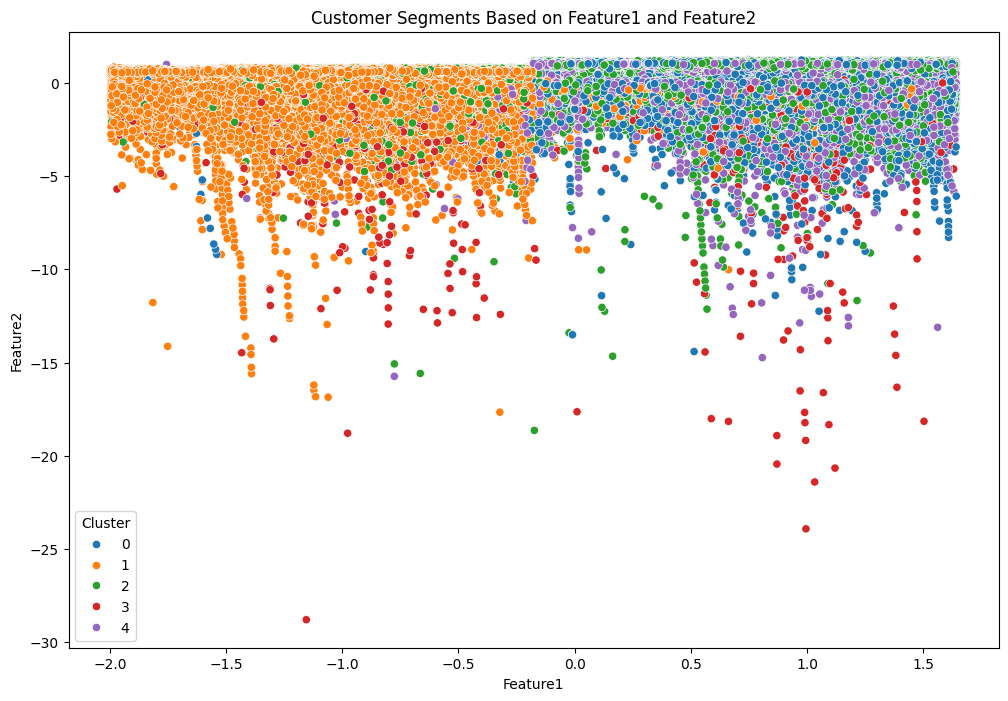

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_numpy is your preprocessed dataset
# Option 2: Create DataFrame with all features
columns = [f"Feature{i+1}" for i in range(X_train_numpy.shape[1])]
X_train_df = pd.DataFrame(X_train_numpy, columns=columns)

# Step 1: Apply K-Means
n_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_numpy)
X_train_df['Cluster'] = kmeans.labels_

# Step 2: Analyze Each Cluster
cluster_summary = X_train_df.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

# Step 3: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Feature1', data=X_train_df)
plt.title('Feature1 Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Feature1')
plt.show()

# Visualize Clusters with Scatter Plots
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_train_df['Feature1'],
    y=X_train_df['Feature2'],
    hue=X_train_df['Cluster'],
    palette='tab10',
    legend='full'
)
plt.title('Customer Segments Based on Feature1 and Feature2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
=

Best parameters for K-Means: {'n_clusters': 2}
Best Silhouette Score: 0.0798933133482933


KMeans(n_clusters=2, random_state=42)

**KMeans Clustering**

In [ ]:
import torch

class KMeansAnomalyDetection:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.centroids, self.labels = self._kmeans()

    def _kmeans(self):
        centroids = self.X[torch.randperm(len(self.X))[:self.n_clusters]]

        for _ in range(self.max_iter):
            distances = torch.cdist(self.X, centroids)
            labels = torch.argmin(distances, dim=1)

            new_centroids = torch.stack([self.X[labels == k].mean(dim=0) for k in range(self.n_clusters)])

            if torch.all(torch.eq(centroids, new_centroids)):
                break

            centroids = new_centroids

        return centroids, labels

    def anomaly_scores(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        distances = torch.cdist(X_tensor, self.centroids)
        min_distances = torch.min(distances, dim=1).values
        return min_distances.numpy()

kmeans_anomaly_detector = KMeansAnomalyDetection(n_clusters=8, max_iter=300)
kmeans_anomaly_detector.fit(X_train_numpy)

anomaly_scores_kmeans = kmeans_anomaly_detector.anomaly_scores(X_test_numpy)

best_score = min(anomaly_scores_kmeans)

print("Best Anomaly Score (KMeans):", best_score)

Best Anomaly Score (KMeans): 1.8153552


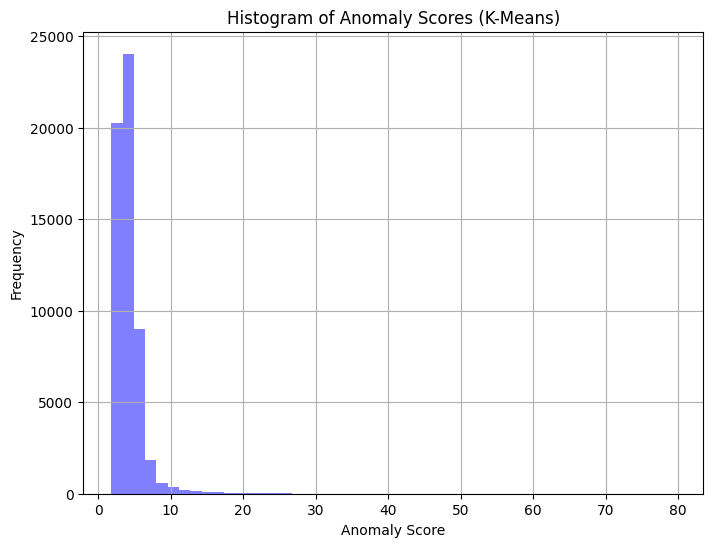

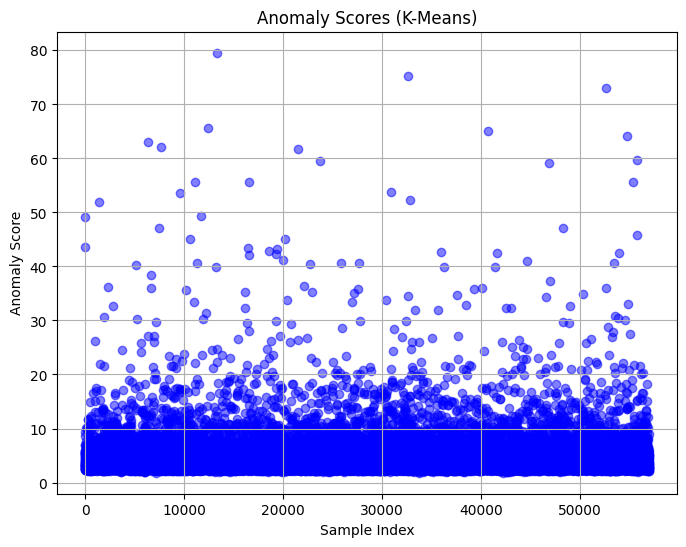

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(anomaly_scores_kmeans, bins=50, color='blue', alpha=0.5)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores (K-Means)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(range(len(anomaly_scores_kmeans)), anomaly_scores_kmeans, color='blue', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores (K-Means)')
plt.grid(True)
plt.show()


In [ ]:
threshold = np.percentile(anomaly_scores_kmeans, 95)

y_pred_kmeans = anomaly_scores_kmeans > threshold

tp_kmeans = np.sum((y_pred_kmeans == 1) & (y_true == 1))
fp_kmeans = np.sum((y_pred_kmeans == 1) & (y_true == 0))
fn_kmeans = np.sum((y_pred_kmeans == 0) & (y_true == 1))

precision_kmeans = tp_kmeans / (tp_kmeans + fp_kmeans)
recall_kmeans = tp_kmeans / (tp_kmeans + fn_kmeans)

print("Precision (K-Means):", precision_kmeans)
print("Recall (K-Means):", recall_kmeans)


Precision (K-Means): 0.030186030186030187
Recall (K-Means): 0.8775510204081632


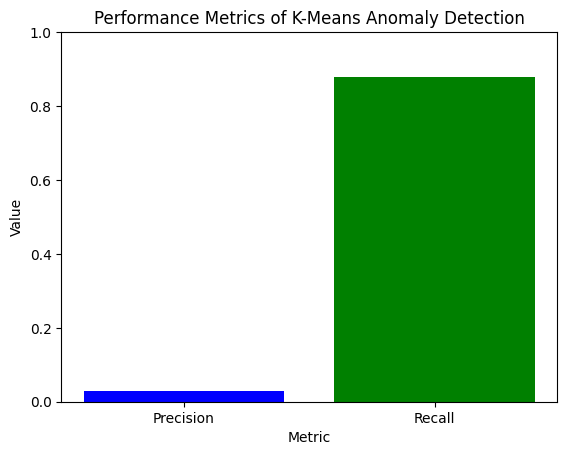

In [ ]:
import matplotlib.pyplot as plt

threshold = np.percentile(anomaly_scores_kmeans, 95)
y_pred_kmeans = anomaly_scores_kmeans > threshold
tp_kmeans = np.sum((y_pred_kmeans == 1) & (y_true == 1))
fp_kmeans = np.sum((y_pred_kmeans == 1) & (y_true == 0))
fn_kmeans = np.sum((y_pred_kmeans == 0) & (y_true == 1))
precision_kmeans = tp_kmeans / (tp_kmeans + fp_kmeans)
recall_kmeans = tp_kmeans / (tp_kmeans + fn_kmeans)

labels = ['Precision', 'Recall']
values = [precision_kmeans, recall_kmeans]

plt.bar(labels, values, color=['blue', 'green'])
plt.title('Performance Metrics of K-Means Anomaly Detection')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.show()


In [ ]:
precision_kmeans, recall_kmeans, _ = precision_recall_curve(y_true, -anomaly_scores_kmeans)
auprc_kmeans = auc(recall_kmeans, precision_kmeans)
print("K-Means Anomaly Detection AUPRC:", auprc_kmeans)

K-Means Anomaly Detection AUPRC: 0.0008672772425895581


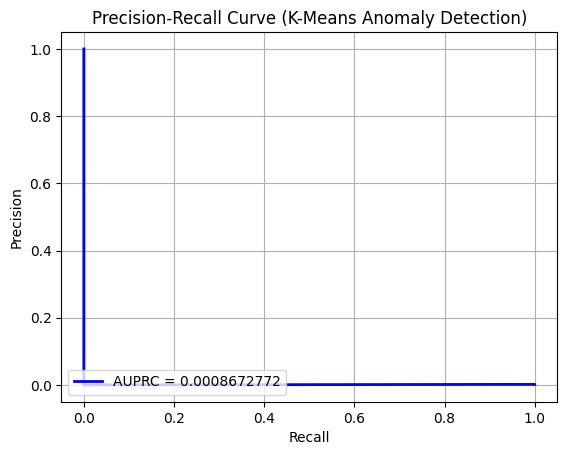

In [ ]:
import matplotlib.pyplot as plt

precision_kmeans, recall_kmeans, _ = precision_recall_curve(y_true, -anomaly_scores_kmeans)
auprc_kmeans = auc(recall_kmeans, precision_kmeans)

plt.plot(recall_kmeans, precision_kmeans, color='blue', lw=2, label=f'AUPRC = {auprc_kmeans:.10f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (K-Means Anomaly Detection)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [ ]:
print("Anomaly scores:")
print("IOF:", anomaly_scores)
print("KMeans:", best_score)
print("OCSVM", best_score_ocsvm)

print("\nAUPRC:")
print("K-Means", auprc_kmeans)
print("One-Class SVM :", auprc_svm)

print("\nPrecision:")
print("K-Means:", precision_kmeans)
print("OCSVM:", precision_svm)

print("\nRecall:")
print("K-Means:", recall_kmeans)
print("OCSVM:", recall_svm)


Anomaly scores:
IOF: 0.17281932344523634
KMeans: 1.8153552
OCSVM 0.73698956

AUPRC:
K-Means 0.0008672772425895581
One-Class SVM : 0.0008678234339315993

Precision:
K-Means: [0.00172045 0.00172048 0.00170295 ... 0.         0.         1.        ]
OCSVM: [0.00172045 0.00163318 0.00156308 ... 0.         0.         1.        ]

Recall:
K-Means: [1.         1.         0.98979592 ... 0.         0.         0.        ]
OCSVM: [1.         0.94897959 0.90816327 ... 0.         0.         0.        ]


Data Visualization

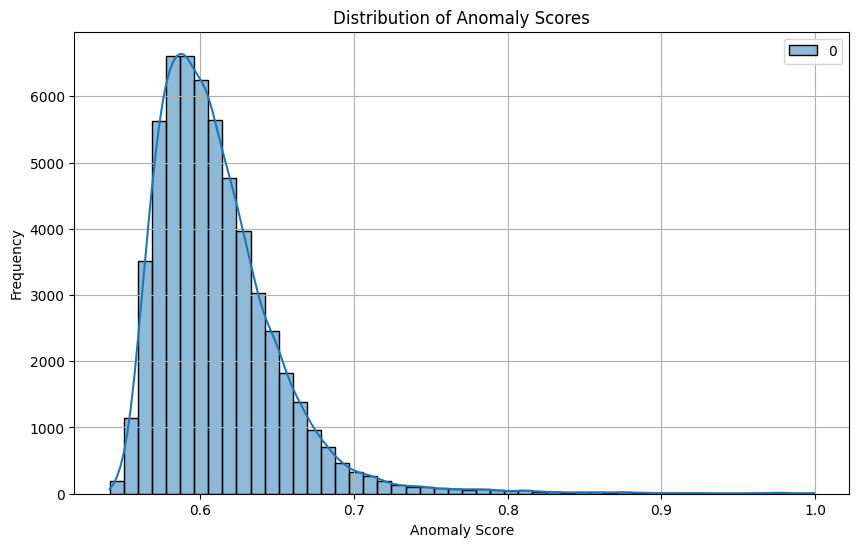

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume `anomaly_scores` is already computed (e.g., from Isolation Forest or K-Means)
plt.figure(figsize=(10, 6))
sns.histplot(anomaly_scores, kde=True, bins=50, color='blue')
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


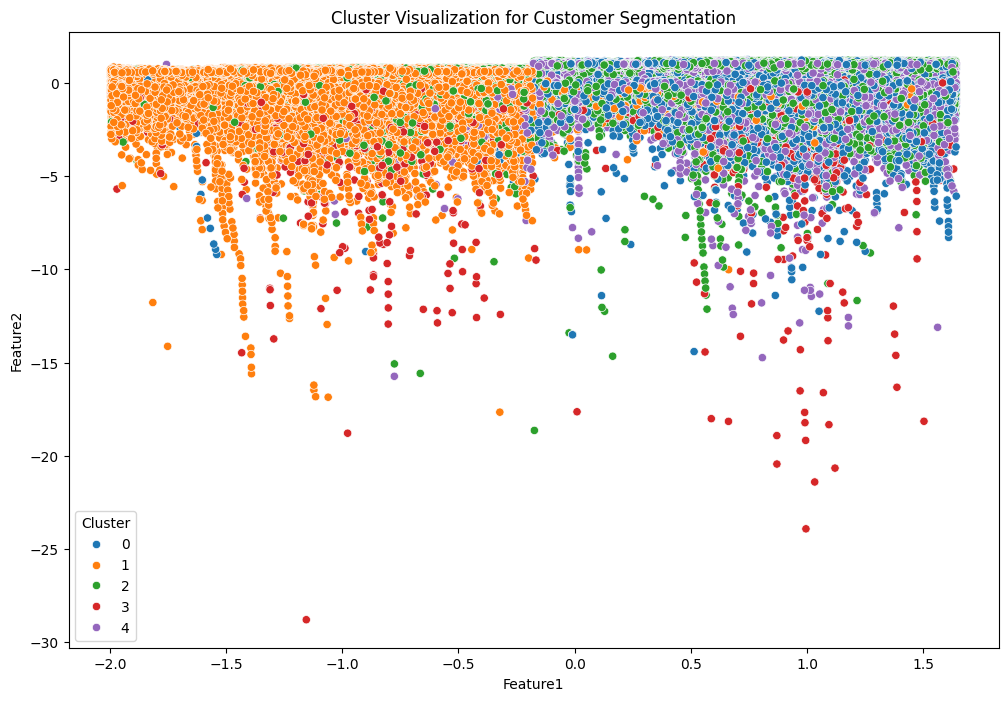

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X_train_df contains features and cluster assignments
# Example: Features 'Feature1' and 'Feature2', with cluster labels in 'Cluster'

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_train_df['Feature1'],
    y=X_train_df['Feature2'],
    hue=X_train_df['Cluster'],
    palette='tab10',
    legend='full'
)
plt.title('Cluster Visualization for Customer Segmentation')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Cluster')
plt.show()


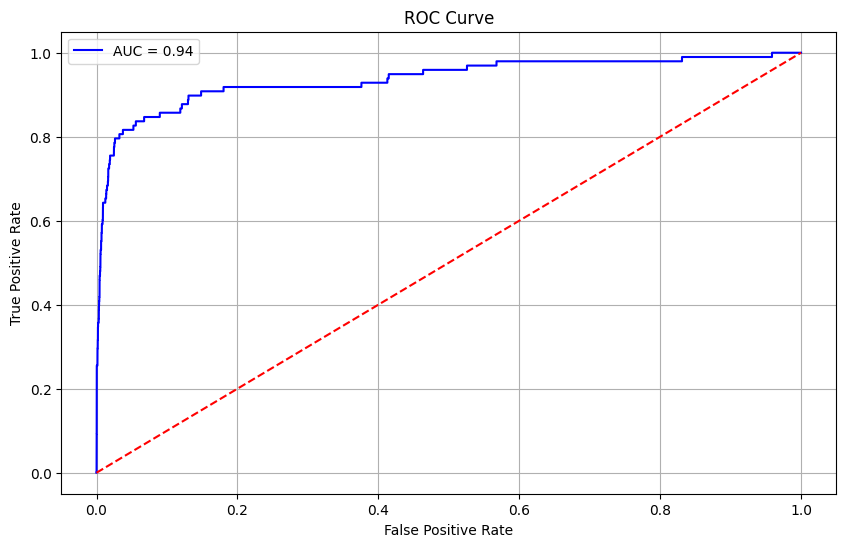

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assume y_test (true labels) and anomaly_scores (predicted scores) are available
# Replace 'y_scores' with 'anomaly_scores'
fpr, tpr, thresholds = roc_curve(y_test, anomaly_scores)
auc_score = roc_auc_score(y_test, anomaly_scores)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

**Time-Series Modeling (ARIMA)**

In [ ]:
transaction_data.index = pd.to_datetime(transaction_data.index, unit='D', origin='unix')
transaction_data = transaction_data.squeeze()  # Convert to 1D Series
transaction_data = transaction_data.fillna(0).astype(float)


Original Data:
1970-01-01    2.498160e+06
1970-01-02    4.802857e+06
1970-01-03    3.927976e+06
1970-01-04    3.394634e+06
1970-01-05    1.624075e+06
1970-01-06    1.623978e+06
1970-01-07    1.232334e+06
1970-01-08    4.464705e+06
1970-01-09    3.404460e+06
1970-01-10    3.832290e+06
Freq: D, dtype: float64

Processed Data:
1970-01-01    2.498160e+06
1970-01-02    4.802857e+06
1970-01-03    3.927976e+06
1970-01-04    3.394634e+06
1970-01-05    1.624075e+06
1970-01-06    1.623978e+06
1970-01-07    1.232334e+06
1970-01-08    4.464705e+06
1970-01-09    3.404460e+06
1970-01-10    3.832290e+06
Freq: D, dtype: float64


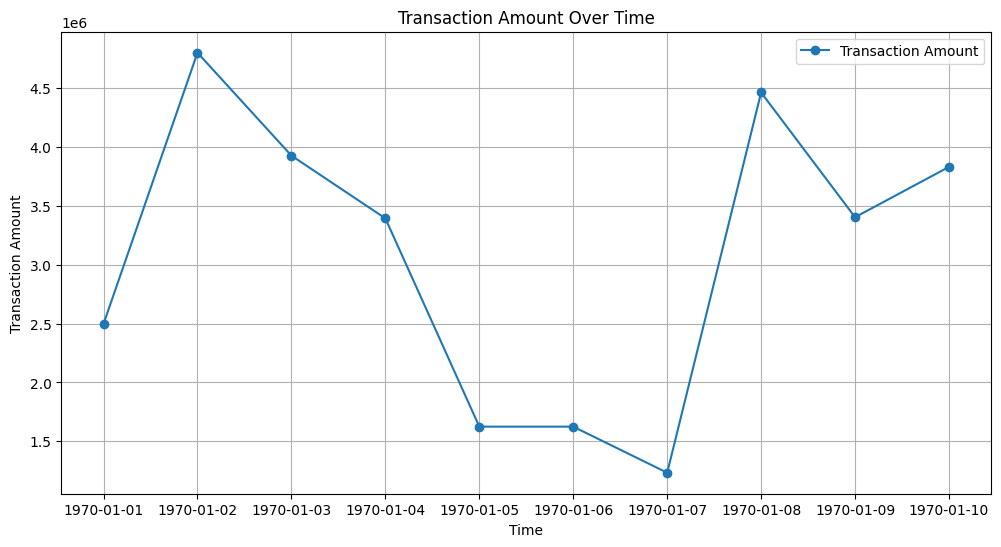

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


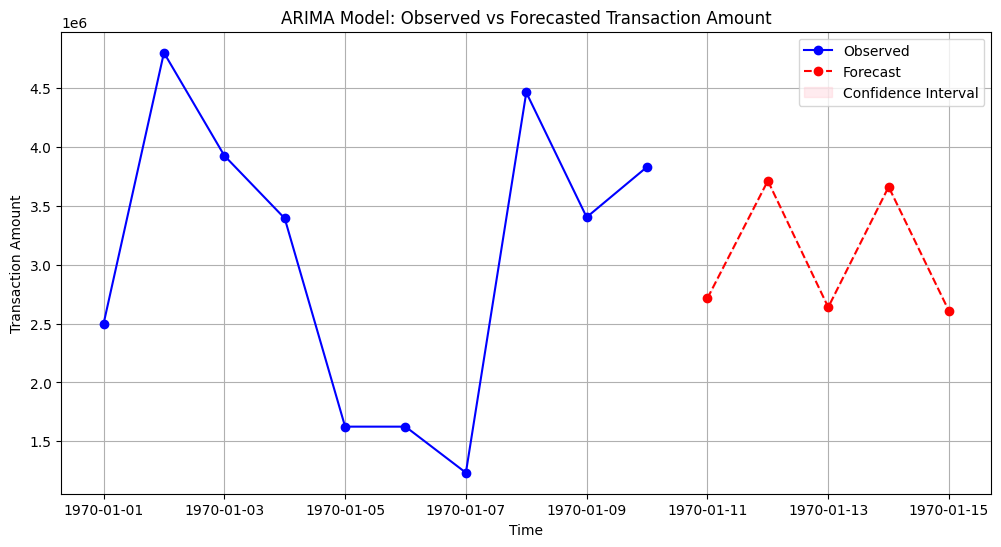

Forecasted Transaction Amounts:
1970-01-11    2.716209e+06
1970-01-12    3.713939e+06
1970-01-13    2.639243e+06
1970-01-14    3.662559e+06
1970-01-15    2.606285e+06
Freq: D, Name: predicted_mean, dtype: float64

Confidence Intervals:
                 lower y       upper y
1970-01-11  2.716097e+06  2.716322e+06
1970-01-12  3.713806e+06  3.714071e+06
1970-01-13  2.639097e+06  2.639390e+06
1970-01-14  3.662408e+06  3.662710e+06
1970-01-15  2.606130e+06  2.606440e+06


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Simulate transaction data with variability for 10 days
np.random.seed(42)
transaction_data = pd.Series(
    np.random.uniform(1e6, 5e6, size=10),
    index=pd.date_range(start="1970-01-01", periods=10, freq='D')
)

print("Original Data:")
print(transaction_data)

# Step 2: Ensure proper time series format and fill missing values
transaction_data = transaction_data.fillna(0).astype(float)

print("\nProcessed Data:")
print(transaction_data)

# Step 3: Plot transaction data
plt.figure(figsize=(12, 6))
plt.plot(transaction_data, label='Transaction Amount', marker='o')
plt.title('Transaction Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Fit ARIMA model
try:
    # Fit ARIMA model with optimized parameters
    model = ARIMA(transaction_data, order=(2, 1, 2))  # Adjust ARIMA parameters (p, d, q)
    model_fit = model.fit()

    # Step 5: Forecast future transactions with confidence intervals
    forecast_steps = 5  # Forecast the next 5 days
    forecast = model_fit.get_forecast(steps=forecast_steps)
    forecast_index = pd.date_range(transaction_data.index[-1], periods=forecast_steps + 1, freq='D')[1:]

    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # Step 6: Plot observed vs forecasted data
    plt.figure(figsize=(12, 6))
    plt.plot(transaction_data, label='Observed', color='blue', marker='o')
    plt.plot(forecast_index, forecast_values, label='Forecast', color='red', linestyle='--', marker='o')
    plt.fill_between(
        forecast_index,
        conf_int.iloc[:, 0],
        conf_int.iloc[:, 1],
        color='pink',
        alpha=0.3,
        label='Confidence Interval'
    )
    plt.title('ARIMA Model: Observed vs Forecasted Transaction Amount')
    plt.xlabel('Time')
    plt.ylabel('Transaction Amount')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 7: Print forecasted values and confidence intervals
    print("Forecasted Transaction Amounts:")
    print(forecast_values)
    print("\nConfidence Intervals:")
    print(conf_int)

except Exception as e:
    print("Error during ARIMA fitting/forecasting:", str(e))


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv') # Replace with your file path
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**LSTM Model**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - loss: 0.0754 - val_loss: 0.0181
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0221 - val_loss: 0.0183
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0196 - val_loss: 0.0190
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - loss: 0.0195 - val_loss: 0.0183
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0192 - val_loss: 0.0188
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - loss: 0.0193 - val_loss: 0.0215
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - loss: 0.0212 - val_loss: 0.0182
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0189 - val_loss: 0.0189
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0199 - val_loss: 0.0184
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0188 - val_loss: 0.0182
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0204 - val_loss: 0.0195


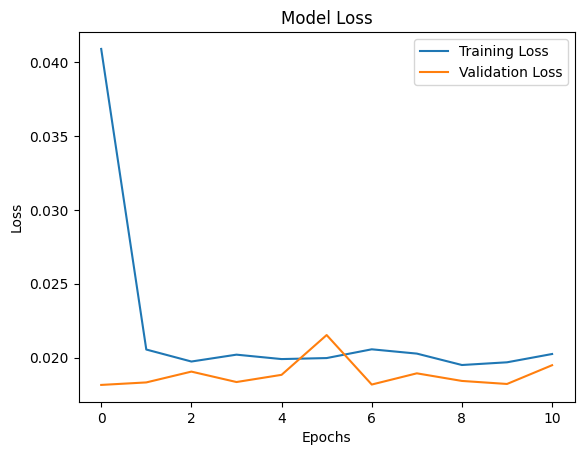

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Mean Squared Error (MSE): 3400805.39
Mean Absolute Error (MAE): 1321.52
Root Mean Squared Error (RMSE): 1844.13


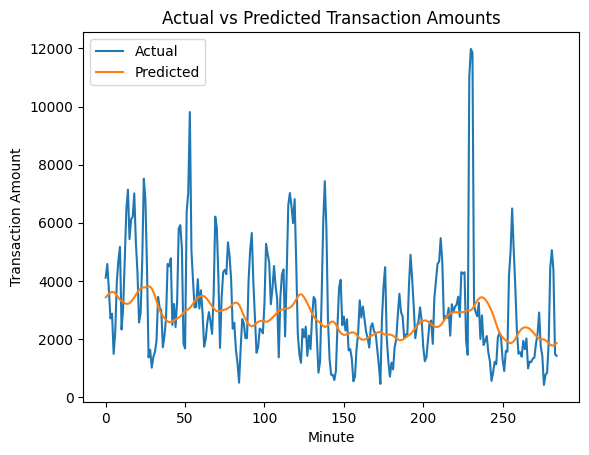

In [ ]:
# LSTM final corrected model with best accuracy and MSE, MSE values for report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the dataset

# Group 'Time' column into minute intervals (1 minute = 60 seconds)
data['Minute'] = (data['Time'] // 60).astype(int)  # Convert seconds to minutes

# Aggregate transaction amounts by minute
minute_data = data.groupby('Minute')['Amount'].sum()

# Replace any NaN or infinite values
minute_data = minute_data.replace([np.inf, -np.inf], np.nan).dropna()

# Apply differencing to remove trends
minute_data_diff = minute_data.diff().dropna()

# Remove negative values caused by differencing
minute_data_diff = minute_data_diff[minute_data_diff > 0]

# Apply a moving average to smooth the data
minute_data_smoothed = minute_data_diff.rolling(window=3).mean().dropna()

# Apply log transformation to stabilize variance
minute_data_log = np.log1p(minute_data_smoothed)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(minute_data_log.values.reshape(-1, 1))

# Prepare the data for LSTM
sequence_length = 30
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))  # Dropout for regularization
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=1))  # Single output for regression

# Compile the model with gradient clipping and a lower learning rate
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model with early stopping
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predicted_scaled = model.predict(X_test)

# Inverse scale the predictions and actual values
predicted_log = scaler.inverse_transform(predicted_scaled)
actual_log = scaler.inverse_transform(y_test.reshape(-1, 1))

# Convert back to original scale
predicted = np.expm1(predicted_log)
actual = np.expm1(actual_log)

# Evaluate the model
mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted values
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('Actual vs Predicted Transaction Amounts')
plt.xlabel('Minute')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 72s 8ms/step - accuracy: 0.9943 - loss: 0.0319 - val_accuracy: 0.9993 - val_loss: 0.0028
Epoch 2/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 3/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 68s 5ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9994 - val_loss: 0.0025
Epoch 4/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 5/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 6/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9994 - val_loss: 0.0025
Epoch 7/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 8/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9996 - loss: 0

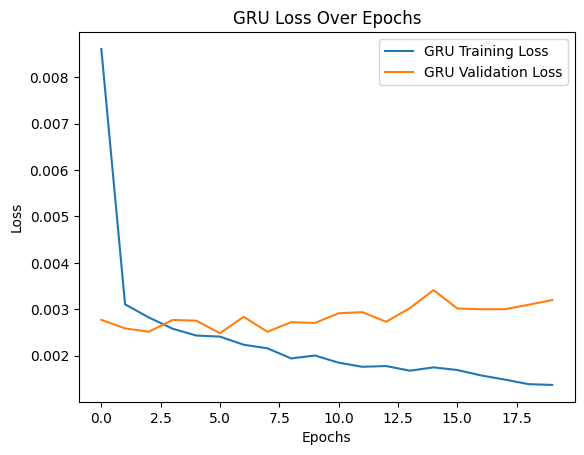

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score




# Separate features and target
X = data.drop(columns=["Class"])  # Features
y = data["Class"]                # Target (1 = Fraud, 0 = Non-Fraud)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for GRU (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))  # Dropout for regularization
gru_model.add(GRU(units=32, return_sequences=False))  # Second GRU layer
gru_model.add(Dropout(0.2))  # Dropout for regularization
gru_model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the GRU model
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate the GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test)
print(f"GRU Test Loss: {gru_loss}")
print(f"GRU Test Accuracy: {gru_accuracy}")

# Predict using the GRU model
y_pred_gru = (gru_model.predict(X_test) > 0.5).astype("int32")

# Classification report for GRU
print("\nGRU Classification Report:")
print(classification_report(y_test, y_pred_gru))

# Accuracy of GRU
gru_accuracy_score = accuracy_score(y_test, y_pred_gru)
print(f"GRU Accuracy Score: {gru_accuracy_score}")

# Plot GRU training and validation loss
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.title('GRU Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
